## We are going to use a Cardiotocographic data.
## There are 2126 measurements and classifications of foetal heart rate (FHR) signals. Our response variable of label here is 'NSP' with three categories: Normal=1; Suspect=2; Pathologic=3.

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns

%matplotlib inline

## Importing the dataset.

In [2]:
data = pd.read_csv('CTG.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(2126, 22)
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']


In [3]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


## Display the data and types of each variable.

In [4]:
data.dtypes

LB            int64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
NSP           int64
dtype: object

## Descriptive Statistics of the dataset. 

In [5]:
data.describe()   

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## Count of the three different foetal heart rate categories.

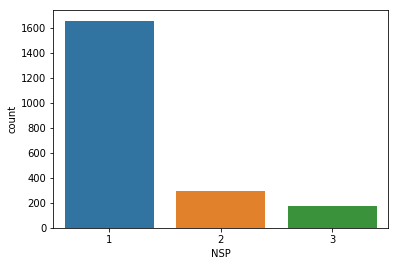

In [6]:
sns.countplot(x = 'NSP', data = data)  

## Next we will create a numpy array of the features and label

In [9]:
Features = np.array(data[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']])
Labels =  np.array(data[['NSP']])   

## Splitting the data into training and test subsets.

In [17]:
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 425)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Standardize the dataset using the zscore standardization process.

In [18]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## We define and fit a neural network model. To start with, we define a single hidden layer neural network model with 50 units. 

In [19]:
nr.seed(1115)
nn_mod = MLPClassifier(hidden_layer_sizes = (50,))
nn_mod.fit(X_train, y_train)

C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Next we score the test data subset using the scaler computed for the training features. Then the predict method is used to compute the scores from the scaled features.

In [20]:
X_test = scale.transform(X_test)
scores = nn_mod.predict(X_test)

## # Evaluating the model results

In [21]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Normal   Score Suspect    Score Pathologic')
    print('Actual Normal      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Suspect     %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Pathologic  %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Normal  Suspect  Pathologic')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                 Score Normal   Score Suspect    Score Pathologic
Actual Normal         312               12                 1
Actual Suspect         15               43                 3
Actual Pathologic       1                6                32

Accuracy        0.91
 
          Normal  Suspect  Pathologic
Num case   325.00     61.00      39.00
Precision   0.95      0.70       0.89
Recall      0.96      0.70       0.82
F1          0.96      0.70       0.85


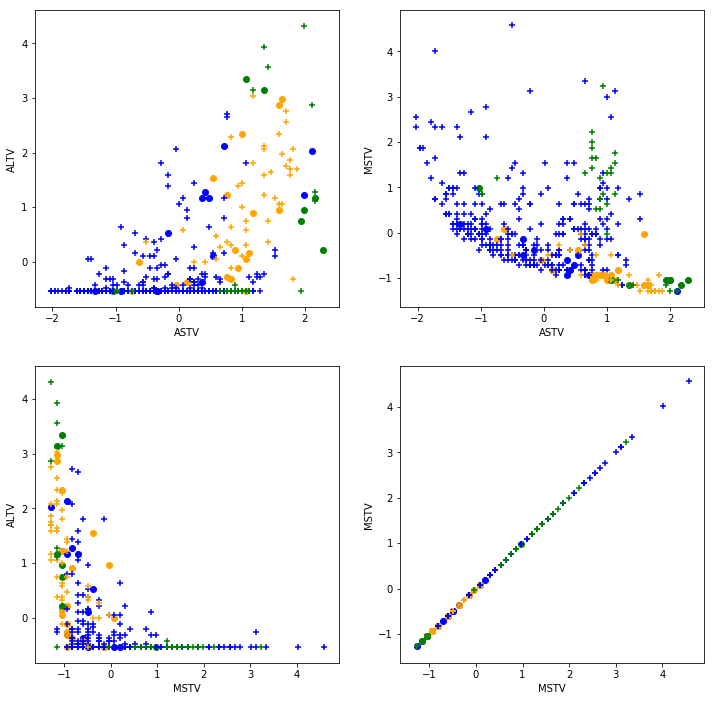

In [22]:
# Displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases

def plot_data_score(data, y_test, scores):
    '''Function to plot data data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    data = pd.DataFrame(data)
    levels = {1:'Normal', 2:'Suspect', 3: 'Pathologic'}
    data['NSP'] = [levels[x] for x in y_test]
    data.columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['ASTV', 'MSTV']
    y_ax = ['ALTV', 'MSTV']
    
    for t in range(2): # loop over correct and incorect classifications
        Normal = data[(data['NSP'] == 'Normal') & (true == t)]
        Suspect = data[(data['NSP'] == 'Suspect') & (true == t)]
        Pathologic = data[(data['NSP'] == 'Pathologic') & (true == t)]
        
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(Normal[x_ax[i]], Normal[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(Suspect[x_ax[i]], Suspect[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(Pathologic[x_ax[i]], Pathologic[y_ax[j]], marker = markers[t], color = 'green') 
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_data_score(X_test, y_test, scores)

## # The more complex model should have greater model capacity, but will be more susceptible to over-fitting. We use a neural network with 2 hidden layers and 100 units per layer, coded as (100,100). 

                 Confusion matrix
                 Score Normal   Score Suspect    Score Pathologic
Actual Normal         315                8                 2
Actual Suspect         14               43                 4
Actual Pathologic       0                3                36

Accuracy        0.93
 
          Normal  Suspect  Pathologic
Num case   325.00     61.00      39.00
Precision   0.96      0.80       0.86
Recall      0.97      0.70       0.92
F1          0.96      0.75       0.89


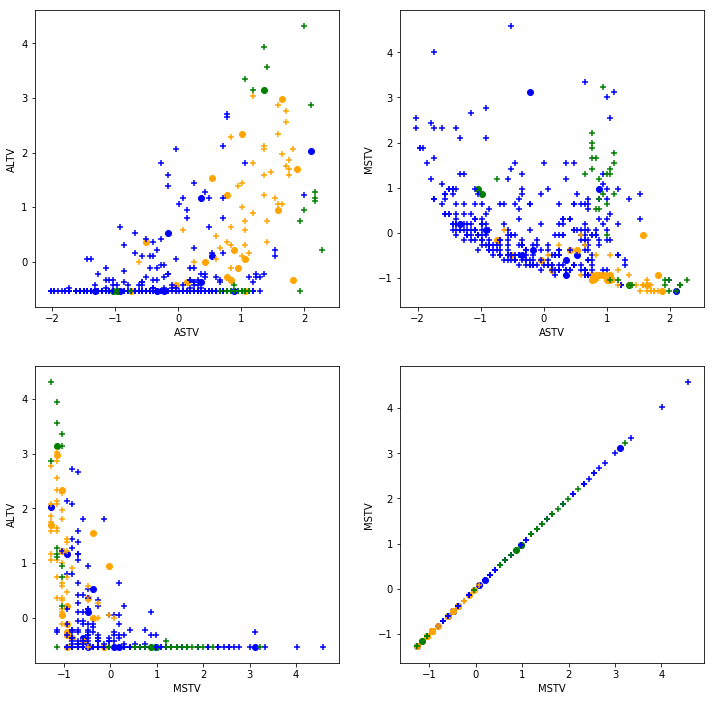

In [23]:
nr.seed(1115)
nn_mod = MLPClassifier(hidden_layer_sizes = (100,100),
                       max_iter=300)
nn_mod.fit(X_train, y_train)
scores = nn_mod.predict(X_test)
print_metrics_3(y_test, scores) 
plot_data_score(X_test, y_test, scores)     

## Increasing the number of neurons does increase the accuracy of the model to an extent. 